# Image augmentation in PyTorch

The `19_image_augmentation` notebook explores techniques for enhancing model performance through image augmentation, a method used to artificially expand training datasets by applying transformations to images. 

The notebook covers loading and visualizing datasets, applying basic and combined transformations, and building a comprehensive data augmentation pipeline. It also discusses augmenting the dataset, training a model with augmented data, evaluating the impact of augmentation, and experimenting with different augmentation strategies to find the most effective ones.

## Table of contents

1. [Understanding image augmentation](#understanding-image-augmentation)
2. [Setting up the environment](#setting-up-the-environment)
3. [Loading and visualizing the dataset](#loading-and-visualizing-the-dataset)
4. [Applying basic image transformations](#applying-basic-image-transformations)
5. [Combining multiple transformations](#combining-multiple-transformations)
6. [Building a Data Augmentation pipeline](#building-a-data-augmentation-pipeline)
7. [Augmenting the dataset](#augmenting-the-dataset)
8. [Training a model with augmented data](#training-a-model-with-augmented-data)
9. [Evaluating the impact of augmentation](#evaluating-the-impact-of-augmentation)
10. [Experimenting with augmentation strategies](#experimenting-with-augmentation-strategies)

## Understanding image augmentation

Image augmentation is a crucial technique in computer vision for enhancing the generalization ability of machine learning models. It involves artificially increasing the size and diversity of a dataset by applying various transformations to the original images. These transformations are designed to create variations of the input images that the model might encounter during testing, improving its robustness and helping prevent overfitting.

In the context of deep learning, image augmentation is particularly useful when working with limited data, allowing the model to train on more varied images without the need to manually collect additional data.

### **Why use image augmentation?**

Image augmentation offers several key benefits:
- **Improves generalization**: Augmented images expose the model to variations it may encounter in the real world, making the model less likely to overfit to the training data.
- **Reduces overfitting**: By increasing the diversity of the training dataset, augmentation prevents the model from memorizing specific features of the dataset and encourages it to learn more general patterns.
- **Works as a regularizer**: Similar to dropout or weight decay, augmentation serves as a form of regularization by creating slightly modified input images during training.

### **Common image augmentation techniques**

Several image augmentation techniques can be applied to transform images in different ways. These transformations modify the images while keeping their labels unchanged, ensuring that the task remains valid (e.g., a picture of a dog remains a picture of a dog after augmentation). Some of the most commonly used augmentations include:

#### **Horizontal and vertical flipping**
Flipping an image horizontally or vertically is one of the simplest augmentation techniques. This introduces variation by simulating a different perspective of the object in the image.

- **Horizontal flipping**: Flips the image along the vertical axis, creating a mirror image.
- **Vertical flipping**: Flips the image along the horizontal axis (less common in natural images but sometimes used in specific domains).

#### **Rotation**
Rotating images by a random angle introduces new orientations of the objects in the dataset. This is especially useful in applications where the orientation of objects is not fixed, such as aerial photography or medical imaging.

#### **Scaling and zooming**
Scaling refers to resizing the image, while zooming focuses on cropping a smaller area of the image and then resizing it to the original dimensions. Both techniques help the model generalize across different scales of objects in the image.

#### **Cropping**
Random cropping involves selecting a random portion of the image and resizing it to the original size. This introduces variation in how much of the object is visible in the image, forcing the model to focus on important features rather than memorizing specific positions.

#### **Translation**
Translation shifts the image horizontally or vertically by a random amount, introducing variation in the object’s position. This is particularly helpful in cases where the position of the object in the image can vary.

#### **Shearing**
Shearing skews the image along the x or y axis, altering its shape by stretching or compressing it. This transformation creates a different perspective of the object in the image.

#### **Color jitter**
Color jitter involves randomly changing the brightness, contrast, saturation, or hue of the image. This helps the model become more robust to lighting variations and color changes in the real world.

#### **Gaussian noise**
Adding Gaussian noise to the image can simulate sensor noise or poor-quality image capture. This helps the model learn to ignore minor noise and focus on the significant features in the image.

#### **Blurring and sharpening**
Blurring simulates out-of-focus images, while sharpening enhances edges and details. Both transformations help the model handle different image quality scenarios during inference.

### **Combining augmentations**

A powerful aspect of image augmentation is that multiple transformations can be applied sequentially or in combination to create more diverse variations of the images. For example, an image can be rotated, flipped, and then cropped, generating a new sample that is significantly different from the original. 

In practice, these augmentations are often applied randomly during each epoch of training, ensuring that the model sees a unique version of the image every time.

### **Image augmentation in PyTorch**

PyTorch provides robust support for image augmentation through the `torchvision.transforms` module, which offers a wide range of transformations that can be applied to images. The `transforms` module allows users to define a sequence of augmentations that are applied during training.

Here’s how the typical augmentation pipeline works in PyTorch:
1. **Composing augmentations**: Multiple transformations are applied sequentially using `transforms.Compose`. This allows you to define a pipeline where, for example, images are randomly rotated, flipped, and then normalized.
2. **Random transformations**: Many of the transformations, such as `RandomHorizontalFlip`, `RandomRotation`, and `RandomResizedCrop`, apply random modifications to the images, ensuring that the model sees different variations during each epoch.

### **Importance of normalization in image augmentation**

After performing various augmentations, it's important to **normalize** the images so that the pixel values are within a specific range, typically between 0 and 1 or -1 and 1. Normalization helps the model train more effectively by keeping the pixel values on a consistent scale, reducing the risk of numerical instability in the network.

Normalization is especially important when using pre-trained models, as many pre-trained models expect input images to be normalized in a specific way (e.g., to match the statistics of the ImageNet dataset).

### **Benefits and trade-offs of image augmentation**

While image augmentation provides many benefits, there are also some trade-offs to consider:
- **Increased training time**: Since new variations of the data are generated on the fly, applying augmentations can slow down the training process. This can be mitigated using hardware acceleration or parallel processing.
- **Choosing appropriate augmentations**: Not all augmentations are suitable for every dataset or task. For example, flipping might be irrelevant or even harmful in tasks where the orientation of the object is critical, such as in medical imaging.

### **Applications of image augmentation**

Image augmentation is widely used across various computer vision tasks, including:
- **Image classification**: Augmentation techniques such as cropping, flipping, and rotation help models generalize better and avoid overfitting on training data.
- **Object detection**: Augmentations like scaling and translation help the model learn to detect objects in different sizes and positions.
- **Segmentation**: Augmentation can be used to improve performance in segmentation tasks, where precise boundaries of objects need to be detected despite variations in image quality or perspective.

### **Maths**

#### **Transformation matrix for geometric augmentations**

Geometric augmentations, such as flipping, rotation, translation, and shearing, can be described using transformation matrices that operate on pixel coordinates in an image. A 2D image can be represented as a set of pixel coordinates $ (x, y) $, and applying a geometric transformation involves multiplying these coordinates by a transformation matrix.

In the case of **rotation**, pixel coordinates are rotated by an angle $ \theta $ around the origin using a 2D rotation matrix:

$$
\begin{bmatrix} 
x' \\
y'
\end{bmatrix}
=
\begin{bmatrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
$$

Here, $ (x', y') $ are the new coordinates after rotation, and $ \theta $ is the rotation angle.

For **translation**, an image is shifted by adding a fixed offset $ t_x $ to the x-coordinates and $ t_y $ to the y-coordinates:

$$
\begin{bmatrix} 
x' \\
y'
\end{bmatrix}
=
\begin{bmatrix}
x \\
y
\end{bmatrix}
+
\begin{bmatrix}
t_x \\
t_y
\end{bmatrix}
$$

This shifts the image horizontally and vertically.

In **scaling**, the x and y coordinates are multiplied by scale factors $ s_x $ and $ s_y $, respectively:

$$
\begin{bmatrix} 
x' \\
y'
\end{bmatrix}
=
\begin{bmatrix}
s_x & 0 \\
0 & s_y
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
$$

Scaling adjusts the size of the image, with uniform scaling when $ s_x = s_y $.

For **shearing**, the pixel coordinates are skewed along one axis. Horizontal shearing can be applied using the following matrix:

$$
\begin{bmatrix} 
x' \\
y'
\end{bmatrix}
=
\begin{bmatrix}
1 & \text{shear\_factor} \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
$$

Shearing alters the image by shifting the x-coordinate proportionally to the y-coordinate.

#### **Random cropping and resizing**

In random cropping, a subregion of the image, represented by a bounding box with coordinates $ (x_1, y_1, x_2, y_2) $, is selected. The selected region is then resized back to the original dimensions using interpolation techniques like bilinear or nearest-neighbor interpolation. Mathematically, resizing involves applying a scaling transformation to the cropped region.

#### **Flipping**

In **horizontal flipping**, the x-coordinates of all pixels are reversed:

$$
x' = \text{image\_width} - x
$$

This creates a mirror image along the vertical axis, while the y-coordinates remain unchanged.

In **vertical flipping**, the y-coordinates are reversed:

$$
y' = \text{image\_height} - y
$$

The x-coordinates remain unchanged, creating a mirror image along the horizontal axis.

#### **Color jittering**

**Brightness adjustment** involves scaling the pixel intensity values $ I $ by a factor $ \beta $:

$$
I' = I \cdot \beta
$$

where $ \beta $ is a random factor that changes the brightness of the image.

For **contrast adjustment**, the pixel values are shifted based on their mean intensity $ \mu $, and a contrast factor $ \alpha $ is applied:

$$
I' = \mu + (I - \mu) \cdot \alpha
$$

In **saturation adjustment**, the saturation of the image in a different color space (such as HSV) is scaled by a factor $ \gamma $:

$$
S' = S \cdot \gamma
$$

For **hue adjustment**, the hue values in the color space are shifted by $ \delta $, and the transformation is expressed as:

$$
H' = (H + \delta) \mod 360
$$

This circularly shifts the hue values within the valid range [0, 360] degrees.

#### **Adding noise**

Gaussian noise is added to an image by sampling random noise values from a Gaussian distribution $ N(0, \sigma^2) $, where $ \sigma^2 $ controls the noise variance. The augmented image is generated as:

$$
I' = I + N
$$

where $ N $ is the noise matrix, and each element is drawn from a Gaussian distribution.

#### **Normalization**

Normalization adjusts pixel values to a specific range, commonly between 0 and 1 or -1 and 1. The normalization formula is:

$$
I' = \frac{I - \mu}{\sigma}
$$

where:
- $ I $ is the original pixel intensity,
- $ \mu $ is the mean intensity,
- $ \sigma $ is the standard deviation.

This operation ensures consistent scaling across all input images, aiding the stability of neural network training.

## Setting up the environment


##### **Q1: How do you install the necessary libraries for applying image augmentation in PyTorch?**


In [2]:
# !pip install torch torchvision

##### **Q2: How do you import the required modules for image loading, augmentation, and processing in PyTorch?**


In [3]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

##### **Q3: How do you set up your environment to use a GPU, and how do you fallback to CPU if necessary in PyTorch?**

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


## Loading and visualizing the dataset


##### **Q4: How do you load an image dataset using `torchvision.datasets` in PyTorch?**


In [5]:
basic_transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = datasets.DTD(root='./data', split='train', download=True, transform=basic_transform)  # Load the Describable Textures Dataset (DTD)

##### **Q5: How do you apply basic image transformations when loading a dataset in PyTorch?**


In [6]:
basic_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

train_dataset.transform = basic_transform

##### **Q6: How do you visualize a few sample images from the dataset using `matplotlib` before applying any augmentations?**

In [7]:
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

dataiter = iter(train_loader)
images, labels = next(iter(train_loader))

In [8]:
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize if needed
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

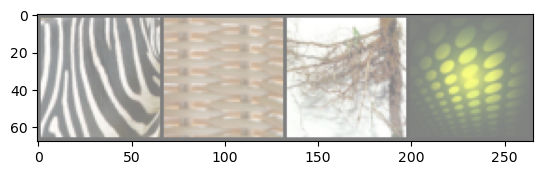

In [9]:
imshow(torchvision.utils.make_grid(images))

## Applying basic image transformations


##### **Q7: How do you apply a random horizontal flip to images using `torchvision.transforms.RandomHorizontalFlip`?**


In [10]:
transform_hflip = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=1),  # p=1 to always flip for visualization
    transforms.ToTensor()
])

train_dataset.transform = transform_hflip

##### **Q8: How do you apply a random rotation to images using `torchvision.transforms.RandomRotation`?**


In [11]:
transform_rotation = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomRotation(30),
    transforms.ToTensor()
])

train_dataset.transform = transform_rotation

##### **Q9: How do you apply color jitter to images using `torchvision.transforms.ColorJitter`?**


In [12]:
transform_colorjitter = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ColorJitter(brightness=0.5, contrast=0.5),
    transforms.ToTensor()
])

train_dataset.transform = transform_colorjitter

##### **Q10: How do you visualize the effect of each individual transformation on the images?**

In [13]:
def visualize_transform(transform, title):
    dataset = datasets.DTD(root='./data', split='train', download=False, transform=transform)
    loader = DataLoader(dataset, batch_size=4, shuffle=True)
    images, _ = next(iter(loader))
    plt.figure(figsize=(8, 8))
    plt.title(title)
    imshow(torchvision.utils.make_grid(images))

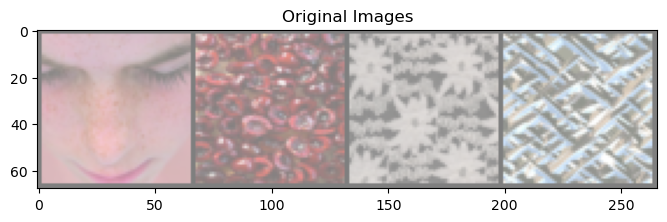

In [14]:
visualize_transform(basic_transform, 'Original Images')

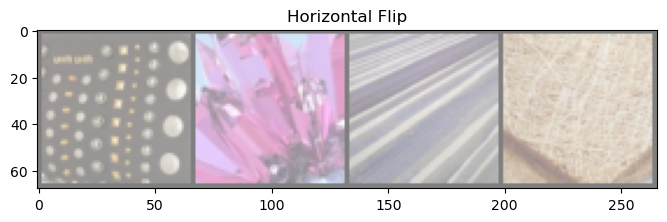

In [15]:
visualize_transform(transform_hflip, 'Horizontal Flip')

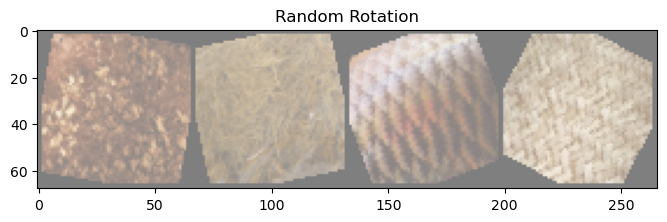

In [16]:
visualize_transform(transform_rotation, 'Random Rotation')

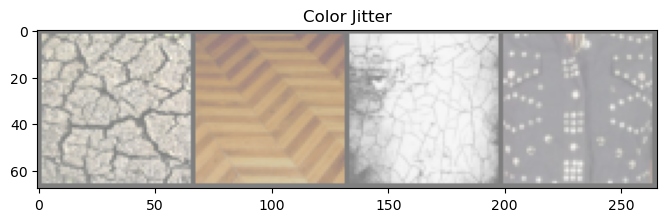

In [17]:
visualize_transform(transform_colorjitter, 'Color Jitter')

## Combining multiple transformations


##### **Q11: How do you use `torchvision.transforms.Compose` to combine multiple transformations into a single pipeline?**


In [18]:
combined_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.5, contrast=0.5),
    transforms.ToTensor()
])

train_dataset.transform = combined_transform

##### **Q12: How do you visualize the effect of combined transformations on sample images from the dataset?**


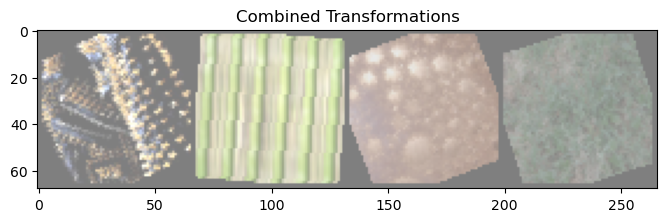

In [19]:
visualize_transform(combined_transform, 'Combined Transformations')

##### **Q13: How do you experiment with the order of transformations in the `Compose` pipeline and observe their combined effect on the dataset?**

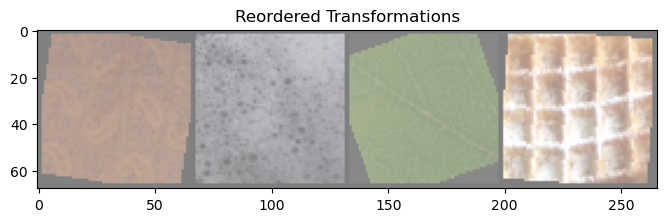

In [20]:
reordered_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.5, contrast=0.5),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

visualize_transform(reordered_transform, 'Reordered Transformations')

## Building a Data Augmentation pipeline


##### **Q14: How do you create a more complex augmentation pipeline using `Compose`?**


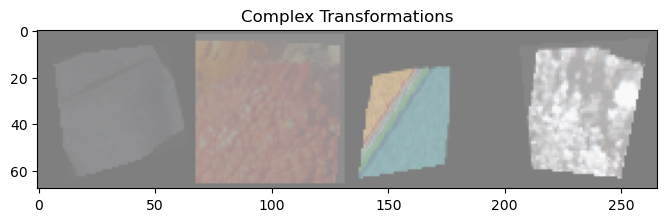

In [21]:
complex_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(45),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    transforms.ColorJitter(brightness=0.7, contrast=0.7, saturation=0.7),
    transforms.RandomPerspective(distortion_scale=0.5, p=0.5),
    transforms.ToTensor()
])

train_dataset.transform = complex_transform

visualize_transform(complex_transform, 'Complex Transformations')

##### **Q15: How do you ensure that augmentations are only applied to the training set and not the validation or test sets?**


In [22]:
train_transform = complex_transform  # Augmentations applied

test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

train_dataset = datasets.DTD(root='./data', split='train', download=False, transform=train_transform)
val_dataset = datasets.DTD(root='./data', split='val', download=False, transform=test_transform)
test_dataset = datasets.DTD(root='./data', split='test', download=False, transform=test_transform)

##### **Q16: How do you modify the augmentation pipeline to apply different intensities of transformations such as stronger rotations or color jitter?**

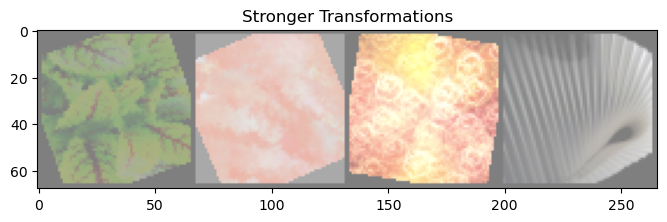

In [23]:
strong_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(90),  # Stronger rotation
    transforms.ColorJitter(brightness=0.9, contrast=0.9, saturation=0.9),
    transforms.ToTensor()
])

train_dataset.transform = strong_transform

visualize_transform(strong_transform, 'Stronger Transformations')

## Augmenting the dataset


##### **Q17: How do you apply the augmentation pipeline to the training dataset using PyTorch’s `DataLoader`?**


In [24]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

##### **Q18: How do you generate augmented variations of each image in the dataset to increase the size of the training data?**


In [25]:
# Custom dataset to duplicate images:
from torch.utils.data import ConcatDataset

augmented_datasets = [train_dataset] * 3  # Repeat dataset 3 times
expanded_train_dataset = ConcatDataset(augmented_datasets)

expanded_train_loader = DataLoader(expanded_train_dataset, batch_size=32, shuffle=True)

##### **Q19: How do you visualize a few augmented images alongside their original versions to verify the augmentation process?**

In [26]:
original_dataset = datasets.DTD(root='./data', split='train', download=False, transform=test_transform)
original_loader = DataLoader(original_dataset, batch_size=4, shuffle=True)
original_images, _ = next(iter(original_loader))

augmented_images, _ = next(iter(train_loader))

In [27]:
def imshow_compare(img1, img2):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    img1 = torchvision.utils.make_grid(img1)
    img1 = img1.numpy().transpose((1, 2, 0))
    axes[0].imshow(img1)
    axes[0].set_title('Original Images')
    axes[0].axis('off')

    img2 = torchvision.utils.make_grid(img2)
    img2 = img2.numpy().transpose((1, 2, 0))
    axes[1].imshow(img2)
    axes[1].set_title('Augmented Images')
    axes[1].axis('off')

    plt.show()

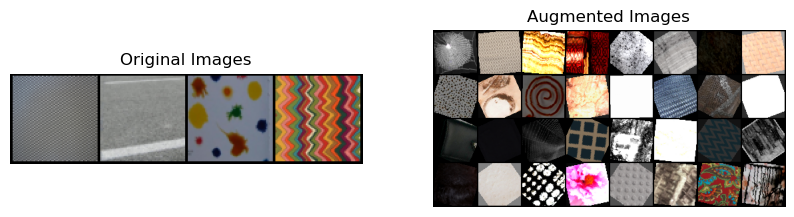

In [28]:
imshow_compare(original_images, augmented_images)

## Training a model with augmented data


##### **Q20: How do you define a simple CNN model in PyTorch for training on the augmented dataset?**


In [29]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=47):  # DTD has 47 classes
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.pool = nn.MaxPool2d(2, 2)  # Output: 16 x 32 x 32
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        # Output after pooling: 32 x 16 x 16
        self.fc1 = nn.Linear(32 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, num_classes)
        
    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # [batch_size, 16, 32, 32]
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # [batch_size, 32, 16, 16]
        x = x.view(-1, 32 * 16 * 16)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [30]:
model = SimpleCNN().to(device)

##### **Q21: How do you set up a training loop in PyTorch to train the CNN on the augmented dataset?**


In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [32]:
num_epochs = 100
train_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()
    for inputs, labels in expanded_train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(expanded_train_dataset)
    train_losses.append(epoch_loss)
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 3.8520
Epoch [20/100], Loss: 3.8506
Epoch [30/100], Loss: 3.8498
Epoch [40/100], Loss: 3.8521
Epoch [50/100], Loss: 3.8521
Epoch [60/100], Loss: 3.8506
Epoch [70/100], Loss: 3.8510
Epoch [80/100], Loss: 3.8506
Epoch [90/100], Loss: 3.8529
Epoch [100/100], Loss: 3.8503


##### **Q22: How do you monitor and log the training loss and accuracy during the training process to ensure the model is learning correctly?**

In [33]:
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    model.train()
    for inputs, labels in expanded_train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    epoch_loss = running_loss / len(expanded_train_dataset)
    epoch_acc = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')

Epoch 10/100, Loss: 3.8506, Accuracy: 1.88%
Epoch 20/100, Loss: 3.8507, Accuracy: 2.09%
Epoch 30/100, Loss: 3.8507, Accuracy: 1.83%
Epoch 40/100, Loss: 3.8507, Accuracy: 1.76%
Epoch 50/100, Loss: 3.8507, Accuracy: 1.86%
Epoch 60/100, Loss: 3.8507, Accuracy: 1.47%
Epoch 70/100, Loss: 3.8507, Accuracy: 1.88%
Epoch 80/100, Loss: 3.8507, Accuracy: 1.93%
Epoch 90/100, Loss: 3.8507, Accuracy: 1.65%
Epoch 100/100, Loss: 3.8507, Accuracy: 1.95%


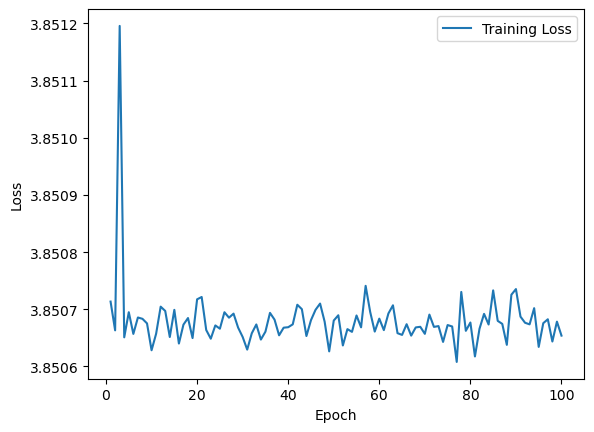

In [34]:
plt.figure()
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

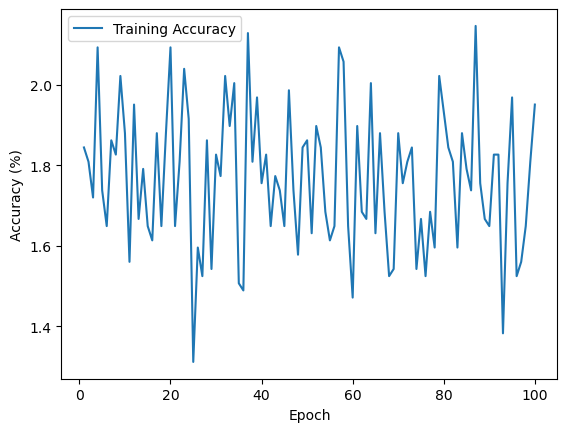

In [35]:
plt.figure()
plt.plot(range(1, num_epochs+1), train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

## Evaluating the impact of augmentation


##### **Q23: How do you evaluate the CNN model on a validation set to compare its performance with and without data augmentation?**


In [36]:
val_losses = []
val_accuracies = []

model.eval()
with torch.no_grad():
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    val_loss = running_loss / len(val_dataset)
    val_acc = 100 * correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    print(f'Validation Loss: {val_loss:.4f}, Accuracy: {val_acc:.2f}%')

Validation Loss: 3.8502, Accuracy: 2.13%


##### **Q24: How do you measure the generalization performance of the model when trained with augmented data?**


In [37]:
model.eval()
with torch.no_grad():
    test_running_loss = 0.0
    test_correct = 0
    test_total = 0
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        test_running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()
    test_loss = test_running_loss / len(test_dataset)
    test_acc = 100 * test_correct / test_total
    print(f'Test Loss: {test_loss:.4f}, Accuracy: {test_acc:.2f}%')

Test Loss: 3.8502, Accuracy: 2.13%


##### **Q25: How do you analyze overfitting in the model by comparing training accuracy with validation accuracy after augmentation?**

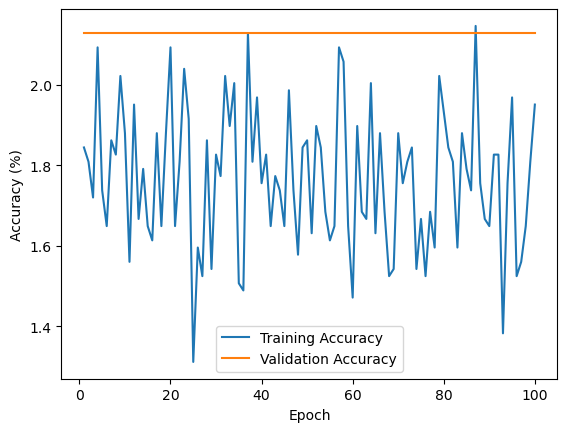

In [38]:
plt.figure()
plt.plot(range(1, num_epochs+1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs+1), [val_accuracies[0]]*num_epochs, label='Validation Accuracy')  # Assuming single evaluation
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

## Experimenting with augmentation strategies


##### **Q26: How do you experiment with different augmentation techniques, such as stronger rotations, zoom, or random erasing?**


In [39]:
experiment_transforms = {
    'Strong Rotation': transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.RandomRotation(90),  # Stronger rotation
        transforms.ToTensor()
    ]),
    'Random Resized Crop': transforms.Compose([
        transforms.RandomResizedCrop(64, scale=(0.5, 1.0)),  # Zoom in/out
        transforms.ToTensor()
    ]),
    'Random Erasing': transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor(),
        transforms.RandomErasing(p=0.5)  # Randomly erase part of the image
    ])
}

In [40]:
def train_and_evaluate(transform, transform_name):
    print(f'\nTraining with {transform_name}')
    train_dataset.transform = transform
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    model = SimpleCNN().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    
    num_epochs = 5  # Reduced epochs for quick experimentation
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        epoch_loss = running_loss / len(train_dataset)
        epoch_acc = 100 * correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_acc:.2f}%')

        model.eval()
        with torch.no_grad():
            val_running_loss = 0.0
            val_correct = 0
            val_total = 0
            for val_inputs, val_labels in val_loader:
                val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)

                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)

                val_running_loss += val_loss.item() * val_inputs.size(0)
                _, val_predicted = torch.max(val_outputs, 1)
                val_total += val_labels.size(0)
                val_correct += (val_predicted == val_labels).sum().item()
            val_epoch_loss = val_running_loss / len(val_dataset)
            val_epoch_acc = 100 * val_correct / val_total
            val_losses.append(val_epoch_loss)
            val_accuracies.append(val_epoch_acc)
            print(f'Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.2f}%')

    epochs_range = range(1, num_epochs + 1)
    plt.figure()
    plt.plot(epochs_range, train_losses, label='Training Loss')
    plt.plot(epochs_range, val_losses, label='Validation Loss')
    plt.title(f'Loss for {transform_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
    plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
    plt.title(f'Accuracy for {transform_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.show()


Training with Strong Rotation
Epoch 1/5, Training Loss: 3.9993, Training Accuracy: 3.67%
Validation Loss: 3.8354, Validation Accuracy: 4.57%
Epoch 2/5, Training Loss: 3.7986, Training Accuracy: 4.95%
Validation Loss: 3.7784, Validation Accuracy: 5.69%
Epoch 3/5, Training Loss: 3.7245, Training Accuracy: 6.33%
Validation Loss: 3.7423, Validation Accuracy: 5.64%
Epoch 4/5, Training Loss: 3.6923, Training Accuracy: 6.97%
Validation Loss: 3.7453, Validation Accuracy: 6.12%
Epoch 5/5, Training Loss: 3.6228, Training Accuracy: 7.87%
Validation Loss: 3.6981, Validation Accuracy: 7.18%


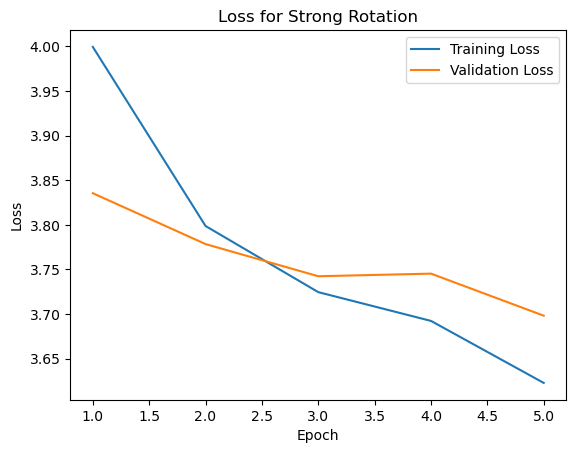

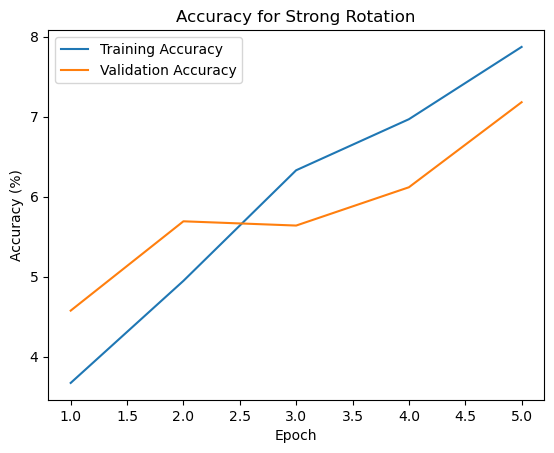


Training with Random Resized Crop
Epoch 1/5, Training Loss: 3.9380, Training Accuracy: 2.71%
Validation Loss: 3.8304, Validation Accuracy: 3.35%
Epoch 2/5, Training Loss: 3.8044, Training Accuracy: 3.46%
Validation Loss: 3.8037, Validation Accuracy: 3.99%
Epoch 3/5, Training Loss: 3.7693, Training Accuracy: 5.00%
Validation Loss: 3.7848, Validation Accuracy: 3.99%
Epoch 4/5, Training Loss: 3.7439, Training Accuracy: 4.52%
Validation Loss: 3.7694, Validation Accuracy: 5.00%
Epoch 5/5, Training Loss: 3.7176, Training Accuracy: 4.47%
Validation Loss: 3.7525, Validation Accuracy: 5.11%


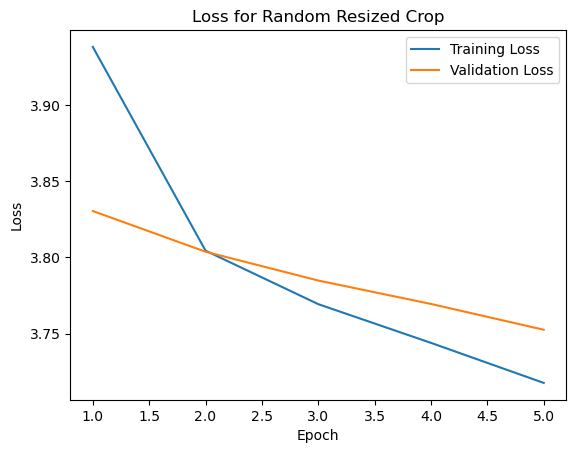

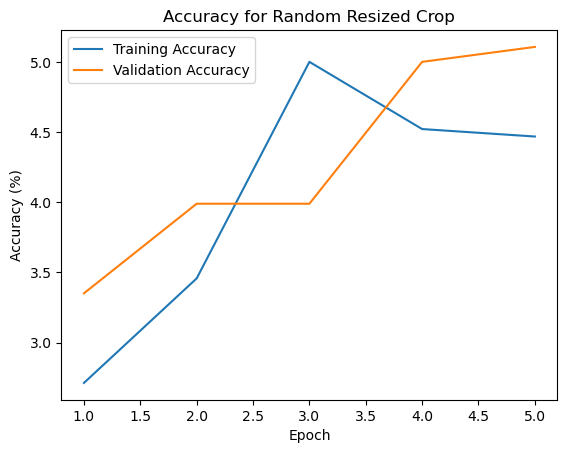


Training with Random Erasing
Epoch 1/5, Training Loss: 3.9529, Training Accuracy: 3.09%
Validation Loss: 3.8299, Validation Accuracy: 3.30%
Epoch 2/5, Training Loss: 3.8126, Training Accuracy: 3.88%
Validation Loss: 3.8247, Validation Accuracy: 2.77%
Epoch 3/5, Training Loss: 3.8048, Training Accuracy: 3.09%
Validation Loss: 3.8173, Validation Accuracy: 3.14%
Epoch 4/5, Training Loss: 3.7838, Training Accuracy: 3.35%
Validation Loss: 3.7974, Validation Accuracy: 3.09%
Epoch 5/5, Training Loss: 3.7547, Training Accuracy: 4.15%
Validation Loss: 3.8005, Validation Accuracy: 3.83%


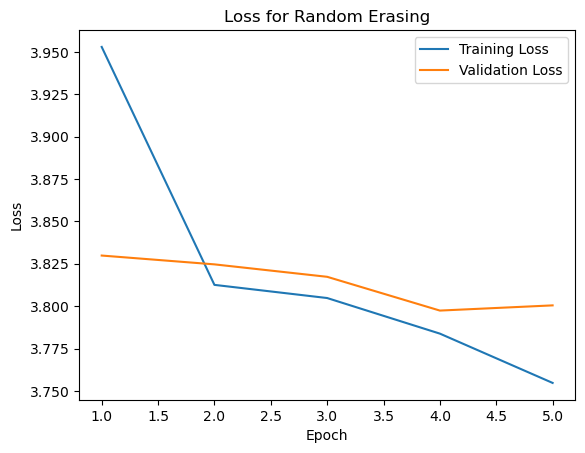

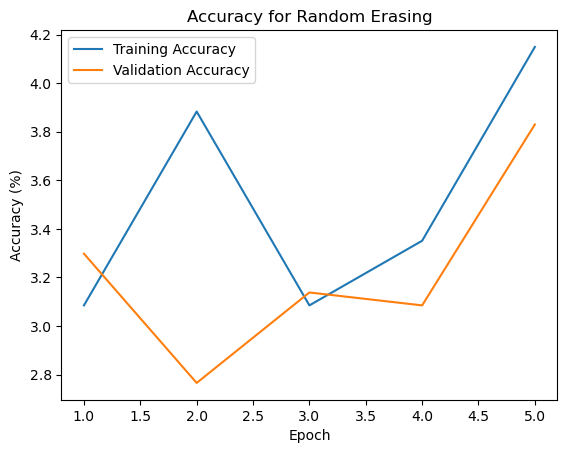

In [41]:
for transform_name, transform in experiment_transforms.items():
    train_and_evaluate(transform, transform_name)

##### **Q27: How do you fine-tune augmentation parameters and observe their effect on the model’s performance?**



Training with Random Rotation 30 degrees

Training with Random Rotation 30 degrees
Epoch 1/5, Training Loss: 3.9308, Training Accuracy: 3.51%
Validation Loss: 3.8262, Validation Accuracy: 3.67%
Epoch 2/5, Training Loss: 3.8027, Training Accuracy: 4.95%
Validation Loss: 3.8227, Validation Accuracy: 4.10%
Epoch 3/5, Training Loss: 3.7693, Training Accuracy: 5.27%
Validation Loss: 3.7953, Validation Accuracy: 3.78%
Epoch 4/5, Training Loss: 3.7313, Training Accuracy: 5.74%
Validation Loss: 3.7680, Validation Accuracy: 5.16%
Epoch 5/5, Training Loss: 3.6913, Training Accuracy: 6.65%
Validation Loss: 3.7265, Validation Accuracy: 5.05%


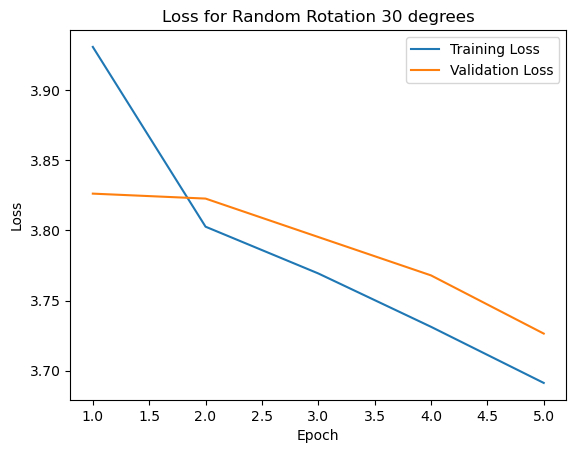

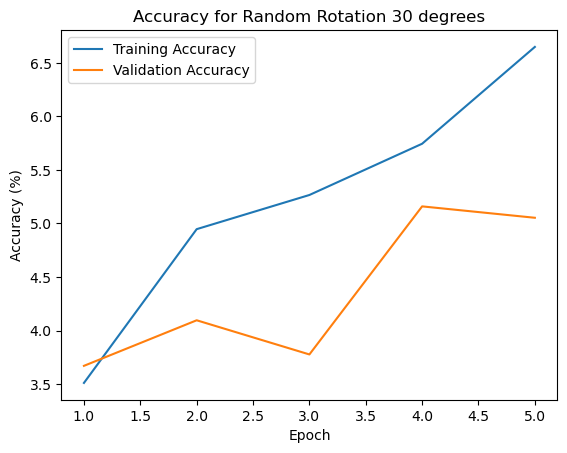


Training with Random Rotation 60 degrees

Training with Random Rotation 60 degrees
Epoch 1/5, Training Loss: 3.9883, Training Accuracy: 2.66%
Validation Loss: 3.8400, Validation Accuracy: 2.77%
Epoch 2/5, Training Loss: 3.8362, Training Accuracy: 3.56%
Validation Loss: 3.8460, Validation Accuracy: 3.88%
Epoch 3/5, Training Loss: 3.8271, Training Accuracy: 3.88%
Validation Loss: 3.8424, Validation Accuracy: 3.40%
Epoch 4/5, Training Loss: 3.8160, Training Accuracy: 4.52%
Validation Loss: 3.8336, Validation Accuracy: 4.20%
Epoch 5/5, Training Loss: 3.7954, Training Accuracy: 5.00%
Validation Loss: 3.8222, Validation Accuracy: 4.15%


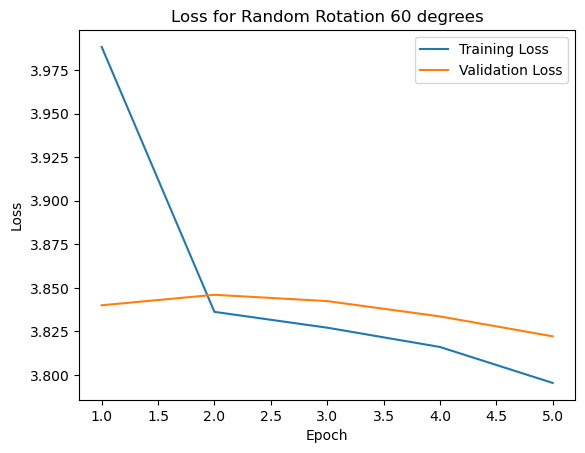

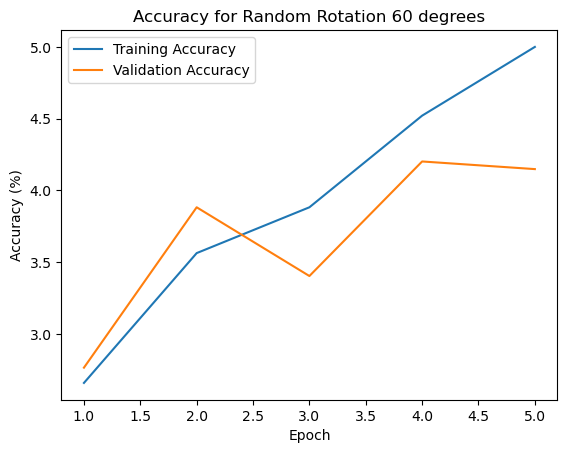


Training with Random Rotation 90 degrees

Training with Random Rotation 90 degrees
Epoch 1/5, Training Loss: 3.9523, Training Accuracy: 2.66%
Validation Loss: 3.8401, Validation Accuracy: 2.29%
Epoch 2/5, Training Loss: 3.8249, Training Accuracy: 2.98%
Validation Loss: 3.8258, Validation Accuracy: 2.13%
Epoch 3/5, Training Loss: 3.8143, Training Accuracy: 2.77%
Validation Loss: 3.8091, Validation Accuracy: 3.56%
Epoch 4/5, Training Loss: 3.7985, Training Accuracy: 2.93%
Validation Loss: 3.8422, Validation Accuracy: 3.40%
Epoch 5/5, Training Loss: 3.7838, Training Accuracy: 3.14%
Validation Loss: 3.7917, Validation Accuracy: 3.14%


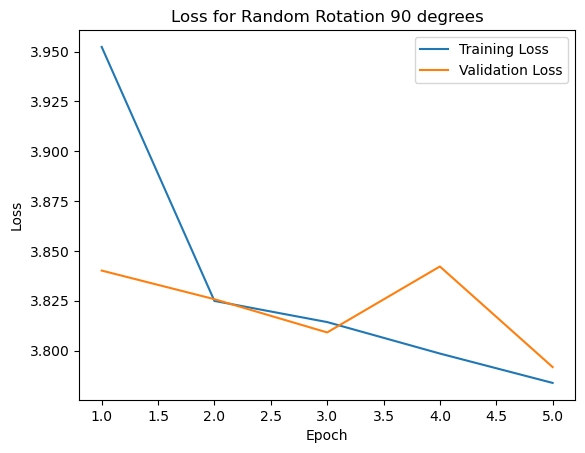

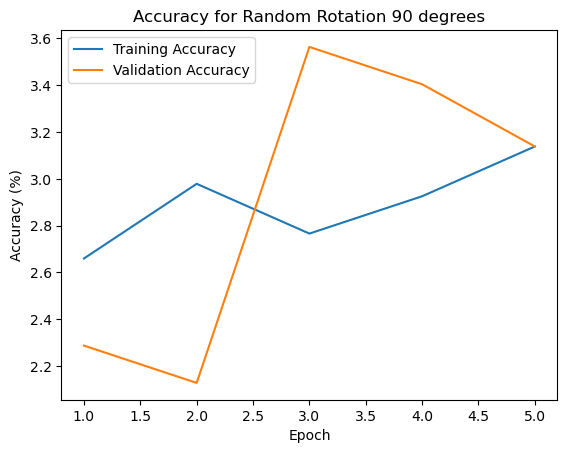

In [42]:
rotation_angles = [30, 60, 90]

for angle in rotation_angles:
    transform_name = f'Random Rotation {angle} degrees'
    print(f'\nTraining with {transform_name}')
    transform = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.RandomRotation(angle),
        transforms.ToTensor()
    ])
    train_and_evaluate(transform, transform_name)


Training with Color Jitter Brightness 0.5

Training with Color Jitter Brightness 0.5
Epoch 1/5, Training Loss: 3.9914, Training Accuracy: 2.34%
Validation Loss: 3.8500, Validation Accuracy: 2.29%
Epoch 2/5, Training Loss: 3.8507, Training Accuracy: 2.02%
Validation Loss: 3.8458, Validation Accuracy: 2.77%
Epoch 3/5, Training Loss: 3.8437, Training Accuracy: 2.34%
Validation Loss: 3.8398, Validation Accuracy: 2.82%
Epoch 4/5, Training Loss: 3.8363, Training Accuracy: 3.46%
Validation Loss: 3.8351, Validation Accuracy: 3.03%
Epoch 5/5, Training Loss: 3.8080, Training Accuracy: 3.14%
Validation Loss: 3.8227, Validation Accuracy: 3.14%


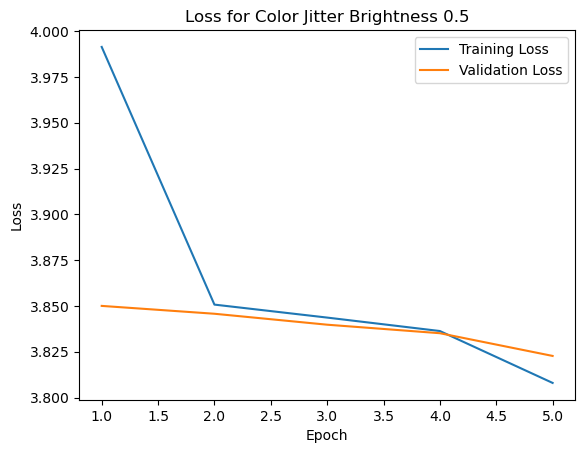

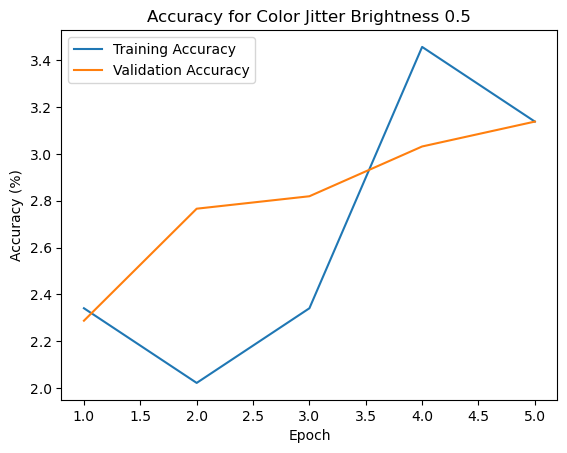


Training with Color Jitter Brightness 0.7

Training with Color Jitter Brightness 0.7
Epoch 1/5, Training Loss: 4.0056, Training Accuracy: 1.86%
Validation Loss: 3.8508, Validation Accuracy: 2.29%
Epoch 2/5, Training Loss: 3.8448, Training Accuracy: 3.03%
Validation Loss: 3.8474, Validation Accuracy: 2.82%
Epoch 3/5, Training Loss: 3.8293, Training Accuracy: 3.03%
Validation Loss: 3.8426, Validation Accuracy: 2.98%
Epoch 4/5, Training Loss: 3.8349, Training Accuracy: 2.98%
Validation Loss: 3.8347, Validation Accuracy: 2.93%
Epoch 5/5, Training Loss: 3.8206, Training Accuracy: 3.19%
Validation Loss: 3.8319, Validation Accuracy: 2.98%


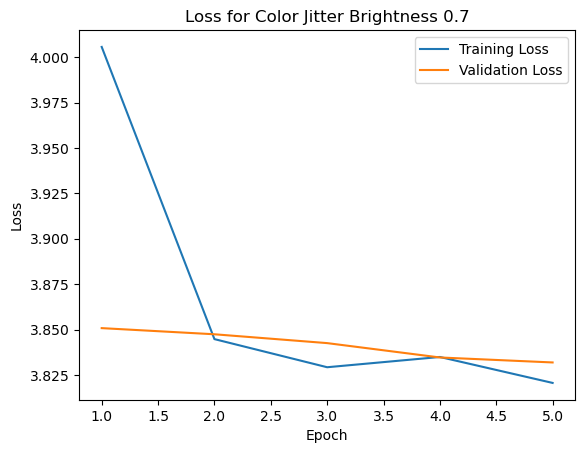

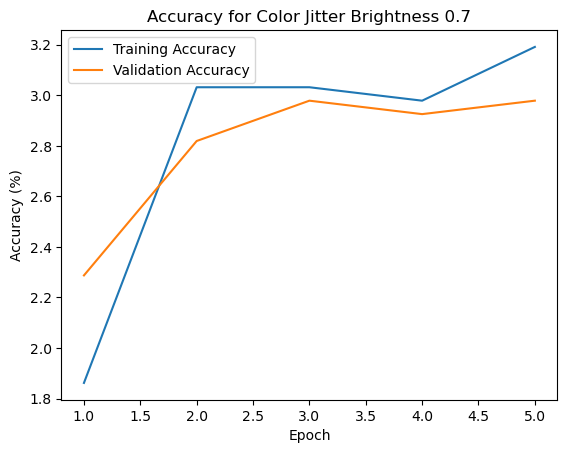


Training with Color Jitter Brightness 0.9

Training with Color Jitter Brightness 0.9
Epoch 1/5, Training Loss: 3.9865, Training Accuracy: 2.71%
Validation Loss: 3.8397, Validation Accuracy: 2.87%
Epoch 2/5, Training Loss: 3.8344, Training Accuracy: 2.87%
Validation Loss: 3.8326, Validation Accuracy: 3.51%
Epoch 3/5, Training Loss: 3.8281, Training Accuracy: 3.14%
Validation Loss: 3.8238, Validation Accuracy: 3.78%
Epoch 4/5, Training Loss: 3.8180, Training Accuracy: 3.88%
Validation Loss: 3.8192, Validation Accuracy: 4.31%
Epoch 5/5, Training Loss: 3.8010, Training Accuracy: 3.99%
Validation Loss: 3.8259, Validation Accuracy: 4.47%


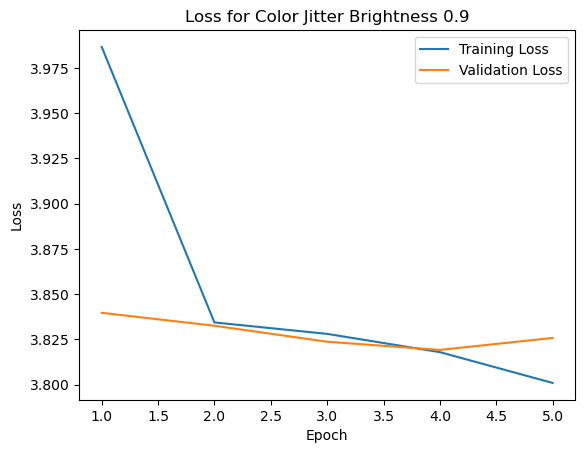

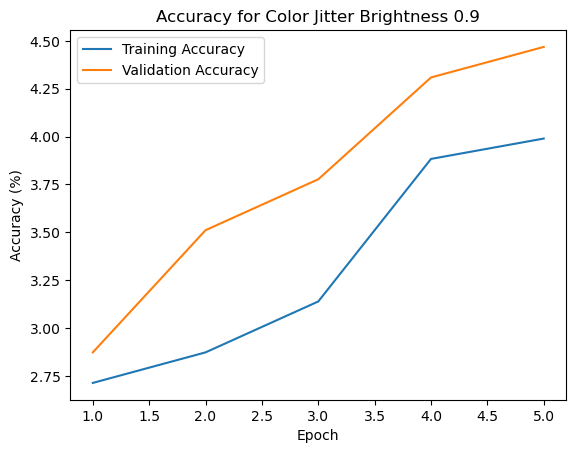

In [43]:
brightness_values = [0.5, 0.7, 0.9]

for brightness in brightness_values:
    transform_name = f'Color Jitter Brightness {brightness}'
    print(f'\nTraining with {transform_name}')
    transform = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ColorJitter(brightness=brightness),
        transforms.ToTensor()
    ])
    train_and_evaluate(transform, transform_name)

##### **Q28: How do you test the performance impact of applying augmentation only during certain epochs of training?**


In [44]:
def train_with_conditional_augmentation(transform, no_aug_transform, transform_name, apply_aug_epochs):
    print(f'\nTraining with {transform_name}, applying augmentation during epochs {apply_aug_epochs}')
    model = SimpleCNN().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    num_epochs = 10
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        if (epoch + 1) in apply_aug_epochs:
            train_dataset.transform = transform
        else:
            train_dataset.transform = no_aug_transform
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        epoch_loss = running_loss / len(train_dataset)
        epoch_acc = 100 * correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_acc:.2f}%')

        model.eval()
        with torch.no_grad():
            val_running_loss = 0.0
            val_correct = 0
            val_total = 0
            for val_inputs, val_labels in val_loader:
                val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)

                val_running_loss += val_loss.item() * val_inputs.size(0)
                _, val_predicted = torch.max(val_outputs, 1)
                val_total += val_labels.size(0)
                val_correct += (val_predicted == val_labels).sum().item()
            val_epoch_loss = val_running_loss / len(val_dataset)
            val_epoch_acc = 100 * val_correct / val_total
            val_losses.append(val_epoch_loss)
            val_accuracies.append(val_epoch_acc)
            print(f'Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.2f}%')

    epochs_range = range(1, num_epochs + 1)
    plt.figure()
    plt.plot(epochs_range, train_losses, label='Training Loss')
    plt.plot(epochs_range, val_losses, label='Validation Loss')
    plt.title(f'Loss for {transform_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
    plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
    plt.title(f'Accuracy for {transform_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.show()

In [45]:
augmentation_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.ToTensor()
])

no_augmentation_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])


Training with Conditional Augmentation, applying augmentation during epochs [1, 2, 3, 4, 5]
Epoch 1/10, Training Loss: 3.9566, Training Accuracy: 2.55%
Validation Loss: 3.8499, Validation Accuracy: 3.51%
Epoch 2/10, Training Loss: 3.8409, Training Accuracy: 3.56%
Validation Loss: 3.8532, Validation Accuracy: 3.40%
Epoch 3/10, Training Loss: 3.8262, Training Accuracy: 3.67%
Validation Loss: 3.8327, Validation Accuracy: 3.51%
Epoch 4/10, Training Loss: 3.8174, Training Accuracy: 3.46%
Validation Loss: 3.8231, Validation Accuracy: 3.46%
Epoch 5/10, Training Loss: 3.8017, Training Accuracy: 3.83%
Validation Loss: 3.8247, Validation Accuracy: 3.56%
Epoch 6/10, Training Loss: 3.8054, Training Accuracy: 3.72%
Validation Loss: 3.8234, Validation Accuracy: 3.56%
Epoch 7/10, Training Loss: 3.7832, Training Accuracy: 3.78%
Validation Loss: 3.8110, Validation Accuracy: 3.46%
Epoch 8/10, Training Loss: 3.7786, Training Accuracy: 3.62%
Validation Loss: 3.8181, Validation Accuracy: 3.35%
Epoch 9/10,

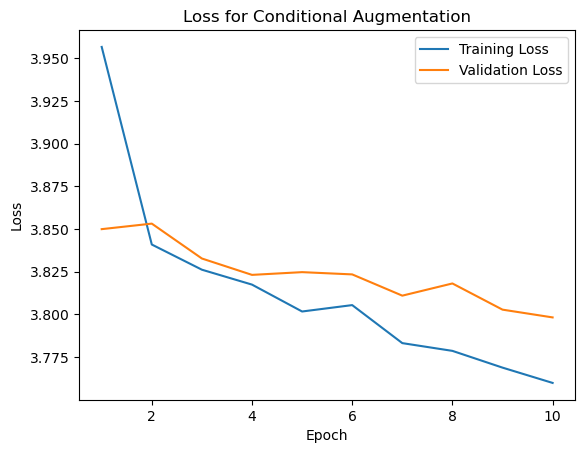

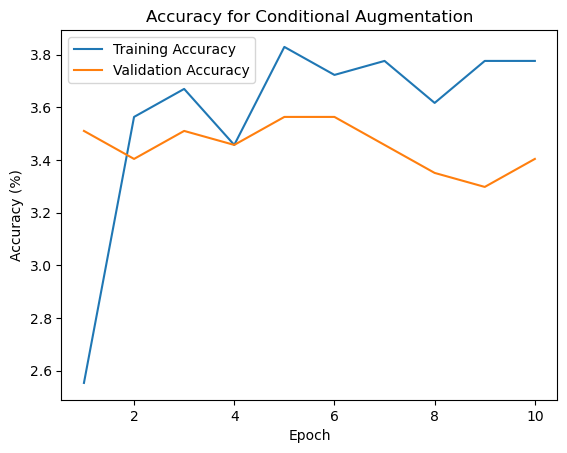

In [46]:
apply_aug_epochs = [1, 2, 3, 4, 5]
train_with_conditional_augmentation(augmentation_transform, no_augmentation_transform, 'Conditional Augmentation', apply_aug_epochs)

##### **Q29: How do you experiment with applying different augmentations to different classes in the dataset to increase model robustness?**

In [70]:
from torch.utils.data import DataLoader, Dataset

original_train_dataset = datasets.DTD(root='./data', split='train', download=True, transform=None)

class_transforms = {
    'banded': transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ]),
    'blotchy': transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.RandomRotation(45),
        transforms.ToTensor()
    ]),
    'braided': transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ColorJitter(brightness=0.5),
        transforms.ToTensor()
    ])
}

default_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [71]:
class ClassSpecificTransformDataset(Dataset):
    def __init__(self, dataset, transform=None, class_transforms=None):
        self.dataset = dataset
        self.default_transform = transform
        self.class_transforms = class_transforms
        self.idx_to_class = {v: k for k, v in self.dataset.class_to_idx.items()}

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, index):
        img, target = self.dataset[index]
        class_label = self.idx_to_class[target]
        if self.class_transforms and class_label in self.class_transforms:
            img = self.class_transforms[class_label](img)
        elif self.default_transform is not None:
            img = self.default_transform(img)
        else:
            img = transforms.ToTensor()(img)
        return img, target

In [72]:
train_dataset = ClassSpecificTransformDataset(
    dataset=original_train_dataset,
    transform=default_transform,
    class_transforms=class_transforms
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

default_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

val_dataset = datasets.DTD(root='./data', split='val', download=False, transform=default_transform)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_dataset = datasets.DTD(root='./data', split='test', download=False, transform=default_transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [73]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=47):  # DTD has 47 classes
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.pool = nn.MaxPool2d(2, 2)  # Output: 16 x 32 x 32
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.fc1 = nn.Linear(32 * 16 * 16, 128)  # Output after pooling: 32 x 16 x 16
        self.fc2 = nn.Linear(128, num_classes)
        
    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # [batch_size, 16, 32, 32]
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # [batch_size, 32, 16, 16]
        x = x.view(-1, 32 * 16 * 16)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN().to(device)

In [74]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [75]:
num_epochs = 5
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)
    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_acc:.2f}%')

    model.eval()
    with torch.no_grad():
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        for val_inputs, val_labels in val_loader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs, val_labels)

            val_running_loss += val_loss.item() * val_inputs.size(0)
            _, val_predicted = torch.max(val_outputs, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()
        val_epoch_loss = val_running_loss / len(val_loader.dataset)
        val_epoch_acc = 100 * val_correct / val_total
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc)
        print(f'Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.2f}%')

Epoch 1/5, Training Loss: 4.0027, Training Accuracy: 3.09%
Validation Loss: 3.8310, Validation Accuracy: 4.41%
Epoch 2/5, Training Loss: 3.7547, Training Accuracy: 6.06%
Validation Loss: 3.7925, Validation Accuracy: 4.63%
Epoch 3/5, Training Loss: 3.7030, Training Accuracy: 7.45%
Validation Loss: 3.7860, Validation Accuracy: 5.37%
Epoch 4/5, Training Loss: 3.6335, Training Accuracy: 7.66%
Validation Loss: 3.8232, Validation Accuracy: 5.21%
Epoch 5/5, Training Loss: 3.5824, Training Accuracy: 9.15%
Validation Loss: 3.7781, Validation Accuracy: 6.38%


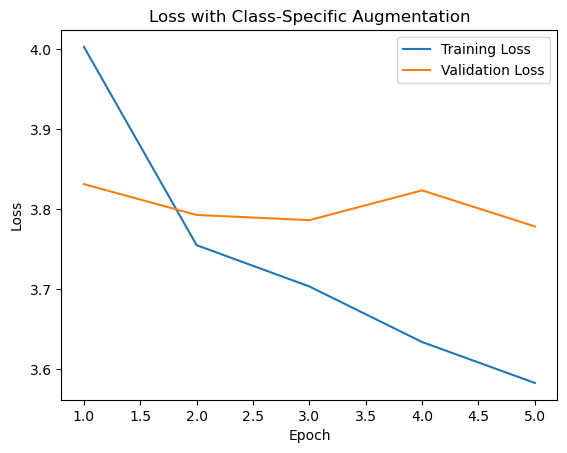

In [76]:
epochs_range = range(1, num_epochs + 1)
plt.figure()
plt.plot(epochs_range, train_losses, label='Training Loss')
plt.plot(epochs_range, val_losses, label='Validation Loss')
plt.title('Loss with Class-Specific Augmentation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

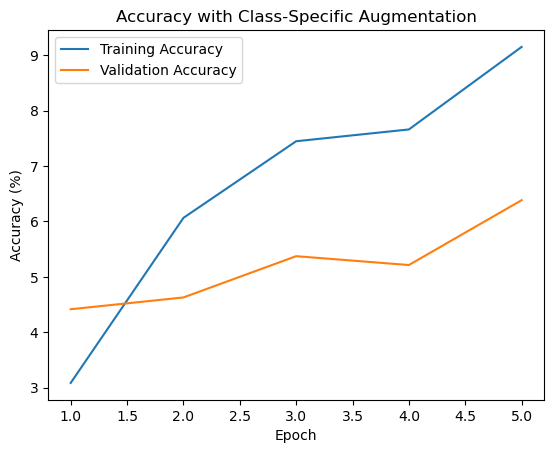

In [77]:
plt.figure()
plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
plt.title('Accuracy with Class-Specific Augmentation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

In [78]:
model.eval()
with torch.no_grad():
    test_running_loss = 0.0
    test_correct = 0
    test_total = 0
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        test_running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()
    test_loss = test_running_loss / len(test_loader.dataset)
    test_acc = 100 * test_correct / test_total
    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%')

Test Loss: 3.7671, Test Accuracy: 7.02%


In [79]:
import shutil
import os

if os.path.exists('data'):
    shutil.rmtree('data')
    print("Folder 'data' has been deleted.")
else:
    print("Folder 'data' does not exist.")

Folder 'data' has been deleted.
